In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from fermipy.gtanalysis import GTAnalysis
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
c = np.load('Crab_5_bin_6/fit0.npy', allow_pickle=True).flat[0]

In [3]:
gta = GTAnalysis('new_data/config_5_6.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5_bin_6'})
gta.load_roi('fit0')

2022-03-03 13:53:51 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2022-03-03 13:53:51 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5_bin_6/fit0.npy
2022-03-03 13:53:51 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-03-03 13:54:11 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [4]:
gta.print_roi()

2022-03-03 13:54:11 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003  56971.25    337392.8
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   3940.21     39284.0
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  25021.47    152925.8
4FGL J0526.3+2246   PointSource    PowerLaw          2.037    116.88      4375.0
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     82.03      3969.0
isodiff             ConstantValue  FileFunction      -----    975.51     37408.6
galdiff             MapCubeFunctio PowerLaw          -----  74066.84    187764.9



In [5]:
gta.print_params()

2022-03-03 13:54:11 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.04    0.0518     1e-05     1e+03     1e-14    *
   1 Index                     2.97    0.0157         0         5        -1    *
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.24    0.0011     1e-05     1e+03     1e-10    *
   4 Index1                     1.9  0.000612         0         5        -1    *
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                  0.5  8.97e-06      -0.5       0.5      0.01    *
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.769   0.00141     1e-05     1e+03     1e-12    

4FGL J0526.3+2246

In [6]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [7]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

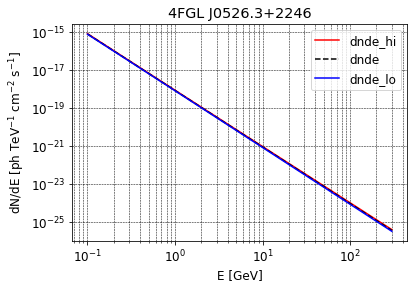

In [8]:
plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [9]:
sed2246 = gta.sed('4FGL J0526.3+2246')

2022-03-03 13:54:12 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-03-03 13:54:28 INFO    GTAnalysis._make_sed(): Fitting SED
2022-03-03 13:54:28 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-03-03 13:54:28 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-03-03 13:54:28 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-03-03 13:54:28 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-03-03 13:54:28 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-03-03 13:54:40 INFO    GTAnalysis.sed(): Finished SED
2022-03-03 13:54:47 INFO    GTAnalysis.sed(): Execution time: 35.67 s


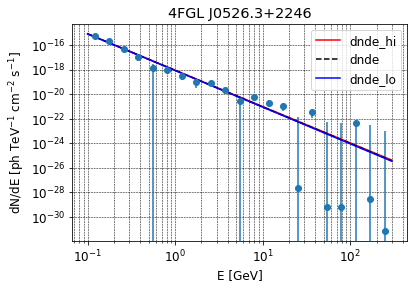

In [10]:
plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['dnde']*1e-6, 
             yerr=sed2246['dnde_err']*1e-6, fmt ='o')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [11]:
len(sed2246['dnde_err']*1e-6)

21

In [12]:
sed2246['dnde_err']*1e-6

array([8.90811918e-17, 3.11638852e-17, 1.09085259e-17, 3.92851204e-18,
       1.39177638e-18, 4.84692572e-19, 1.74616911e-19, 6.03001873e-20,
       2.68729200e-20, 1.03597893e-20, 4.54370330e-21, 2.49158612e-21,
       1.12115541e-21, 6.34839177e-22, 1.32841158e-22, 2.43836346e-22,
       5.07056862e-23, 4.14892095e-23, 4.21035489e-23, 3.21779756e-23,
       9.85822337e-24])

In [13]:
len(sed2246['dnde'])

21

In [14]:
sed2246['dnde']*1e-6

array([5.66065847e-16, 1.93023411e-16, 4.58193332e-17, 1.00559878e-17,
       1.23172493e-18, 9.61046425e-19, 3.15505430e-19, 9.35018991e-20,
       7.80268780e-20, 2.13892799e-20, 2.56441105e-21, 5.86777574e-21,
       1.92608737e-21, 1.01383865e-21, 2.20402407e-28, 3.65004168e-22,
       6.79151730e-30, 6.11455434e-30, 4.14808482e-23, 2.70577545e-29,
       6.49112646e-32])

In [15]:
len(sed2246['e_ctr'])

21

In [16]:
src = gta.roi['4FGL J0526.3+2246']

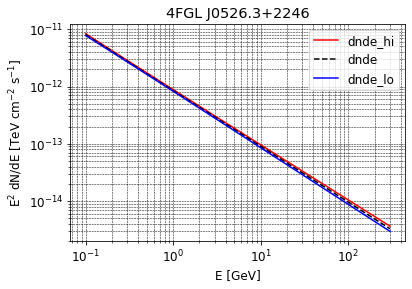

In [17]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

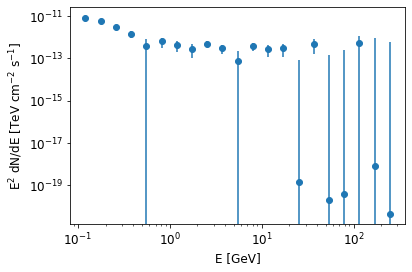

In [18]:
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

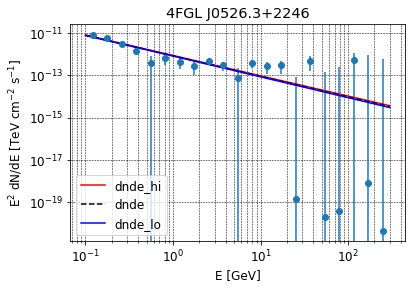

In [19]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2200

In [20]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


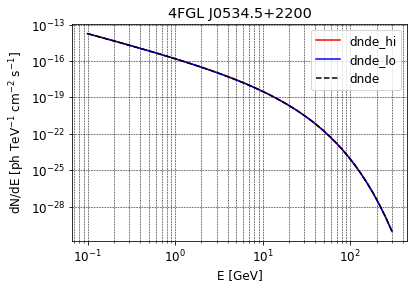

In [21]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')

plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [22]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-03-03 13:54:50 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-03-03 13:55:04 INFO    GTAnalysis._make_sed(): Fitting SED
2022-03-03 13:55:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-03-03 13:55:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-03-03 13:55:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-03-03 13:55:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-03-03 13:55:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']


Drm_Cache::update Measured counts < 0 4FGL J0534.5+2200 20 -3.09981e-15 6.31032e-16
4.49976e-06 5.54142e-06 5.69805e-06 5.1733e-06 4.29063e-06 3.26573e-06 2.32218e-06 1.52539e-06 9.09312e-07 4.94336e-07 2.46682e-07 1.13892e-07 4.67763e-08 1.63492e-08 4.70953e-09 1.09492e-09 1.82907e-10 2.01328e-11 1.32204e-12 4.44625e-14 6.31032e-16 


/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-03-03 13:55:17 INFO    GTAnalysis.sed(): Finished SED
2022-03-03 13:55:24 INFO    GTAnalysis.sed(): Execution time: 33.92 s


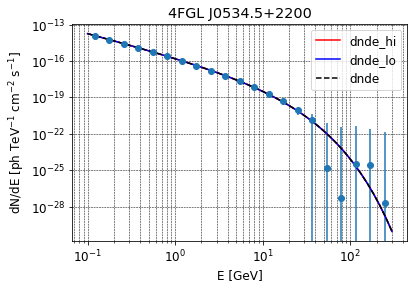

In [23]:
plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['dnde']*1e-6, 
             yerr=sed2200['dnde_err']*1e-6, fmt ='o')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()

In [24]:
src2200 = gta.roi['4FGL J0534.5+2200']

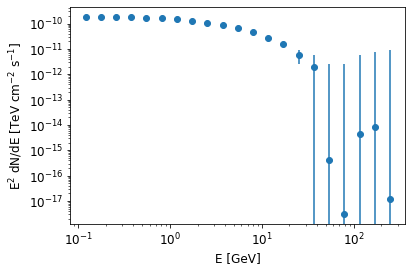

In [25]:
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

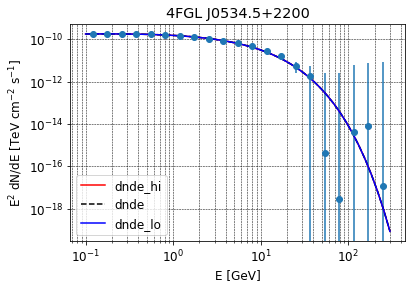

In [26]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2201i

In [27]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


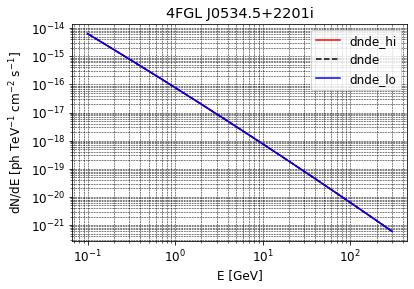

In [28]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [29]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-03-03 13:55:26 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-03-03 13:55:35 INFO    GTAnalysis._make_sed(): Fitting SED
2022-03-03 13:55:35 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-03-03 13:55:35 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-03-03 13:55:35 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-03-03 13:55:35 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-03-03 13:55:35 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation

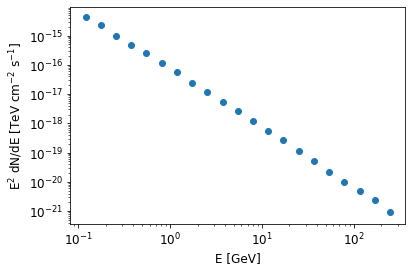

In [30]:
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['dnde']*1e-6, 
             yerr=sed2201i['dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

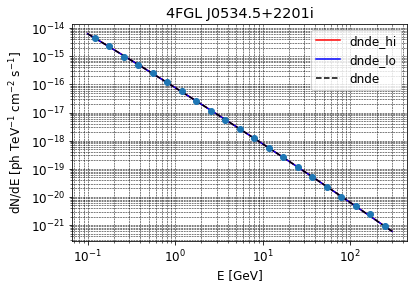

In [31]:
plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['dnde']*1e-6, 
             yerr=sed2201i['dnde_err']*1e-6, fmt ='o')
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

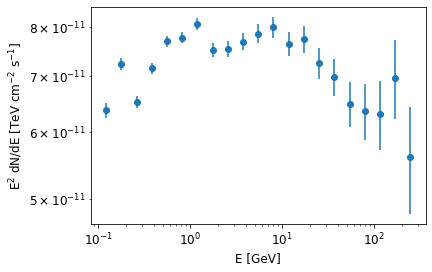

In [32]:
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

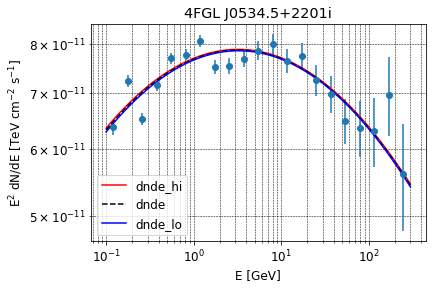

In [33]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2201s

In [34]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


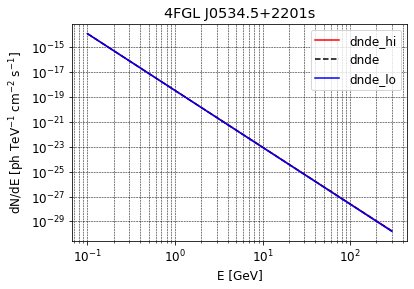

In [35]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [36]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-03-03 13:55:58 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-03-03 13:56:09 INFO    GTAnalysis._make_sed(): Fitting SED
2022-03-03 13:56:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-03-03 13:56:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-03-03 13:56:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-03-03 13:56:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-03-03 13:56:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-03-03 13:56:20 INFO    GTAnalysis.sed(): Finished SED
2022-03-03 13:56:26 INFO    GTAnalysis.sed(): Execution time: 28.60 s


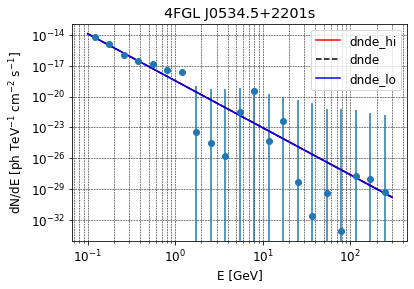

In [37]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['dnde']*1e-6), 
             yerr=np.array(sed2201s['dnde_err']*1e-6), fmt ='o')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [38]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.21001290e-01, 1.77159726e-01, 2.59382099e-01, 3.79769428e-01,
       5.56032274e-01, 8.14094836e-01, 1.19192794e+00, 1.74513890e+00,
       2.55508293e+00, 3.74093360e+00, 5.47721766e+00, 8.01936536e+00,
       1.17412680e+01, 1.71905590e+01, 2.51692341e+01, 3.68510613e+01,
       5.39541680e+01, 7.89950721e+01, 1.15659151e+02, 1.69338224e+02,
       2.47930525e+02])

In [39]:
sed2201s['e2dnde']*1e-6

array([8.49794931e-11, 3.74447884e-11, 7.52584492e-12, 3.66893786e-12,
       4.31242655e-12, 2.39124636e-12, 3.71249842e-12, 1.10857382e-17,
       1.91154077e-18, 2.25130212e-19, 8.43484272e-15, 2.14890346e-12,
       6.96671307e-17, 1.26399397e-14, 3.27669324e-20, 3.53081739e-23,
       1.26922107e-20, 4.98189927e-24, 2.30735699e-18, 2.77378821e-18,
       2.94457725e-19])

In [40]:
sed2201s['e2dnde_err']*1e-6

array([1.31324294e-12, 1.13911310e-12, 1.06823888e-12, 1.08994715e-12,
       1.13954401e-12, 1.22023539e-12, 1.33088535e-12, 3.47873252e-13,
       3.83476290e-13, 7.62457609e-13, 2.08334586e-12, 2.30899642e-12,
       2.33398864e-12, 2.89077287e-12, 2.79422900e-12, 3.11157968e-12,
       1.98083172e-12, 3.58355165e-12, 6.20631124e-12, 7.35527319e-12,
       9.08155691e-12])

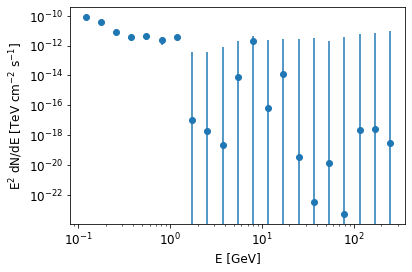

In [41]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['e2dnde']*1e-6), 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

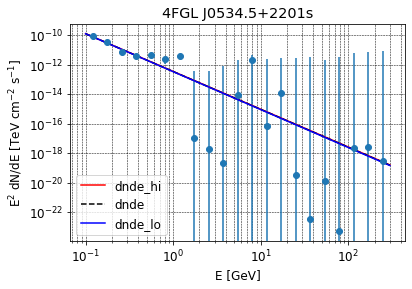

In [42]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [43]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


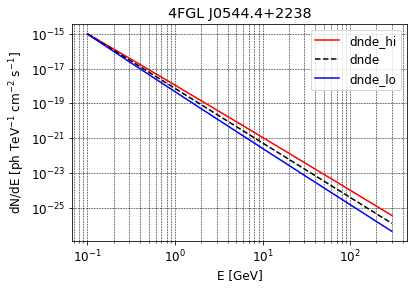

In [44]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [45]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-03-03 13:56:28 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-03-03 13:56:37 INFO    GTAnalysis._make_sed(): Fitting SED
2022-03-03 13:56:37 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-03-03 13:56:37 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-03-03 13:56:37 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-03-03 13:56:37 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-03-03 13:56:37 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-03-03 13:56:47 INFO    GTAnalysis.sed(): Finished SED
2022-03-03 13:56:53 INFO    GTAnalysis.sed(): Execution time: 25.17 s


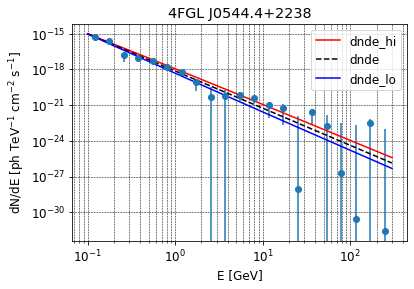

In [46]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['dnde']*1e-6, 
             yerr=sed2238['dnde_err']*1e-6, fmt ='o')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

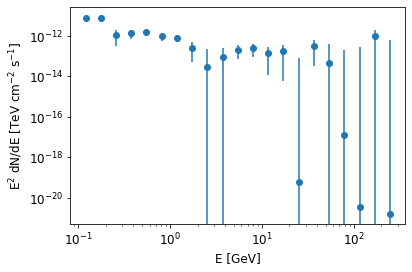

In [47]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

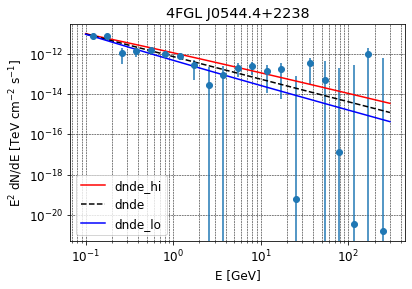

In [48]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()